**План занятия**
1. Логистическая регрессия
2. Основы EDA
3. Практика

# Задача классификации

Бинарная классификация

Данные разделены на два класса, необходимо обучить модель определять принадлежность произвольного объекта (из рассматриваемого множества) к одному из них. На выходе алгоритм должен выдавать либо метку одного из двух классов, либо вероятности принадлежности рассматриваемого объекта к каждому из них.

Многоклассовая классификация

Постановка задачи аналогична задаче бинарной классификации, при условии, что количество классов больше двух. Решается задача, как правило, с помощью всё тех же бинарных классификаторов, но используются различные подходы при их обучении и агрегации прогнозов.

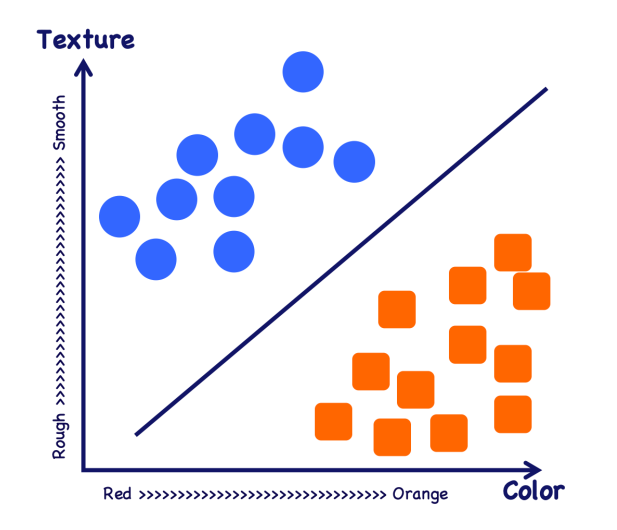

Логистическая функция
 $\sigma(z) = \frac{1}{1 + \exp^{-z}}$
Ищем решение в виде  
$f(x,b)=b_0+b_1 x_1+b_2 x_2+...+b_k x_k$  
$y = \sigma(f(x, b))$  

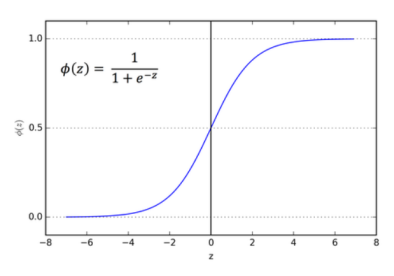

# Метрики

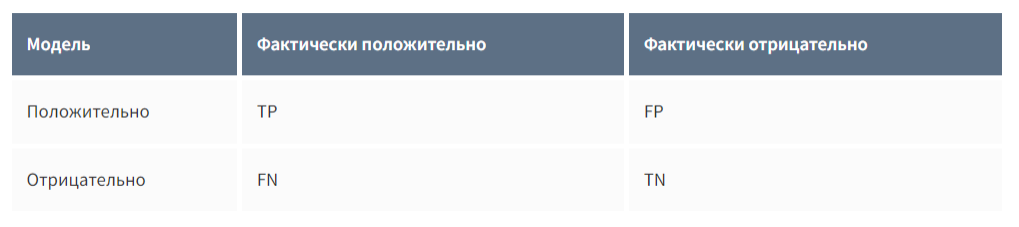

Accuracy (доля правильных ответов)

Accuracy - доля правильных ответов отражает процент объектов, для которых классы были определены верно, среди всего множества объектов.

<center>$\large accuracy = \LARGE \frac{T}{N} = \frac{TP \: + \: TN}{TP \: + \: TN \: + \: FP \: + \: FN}$<center>

Precision (точность) & Recall (полнота)

Precision - точность отражает какой процент объектов, отнесённых к "основному" классу, действительно являются таковыми.

Recall - полнота отражает какой процент объектов "основного" класса было обнаружено алгоритмом.

<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

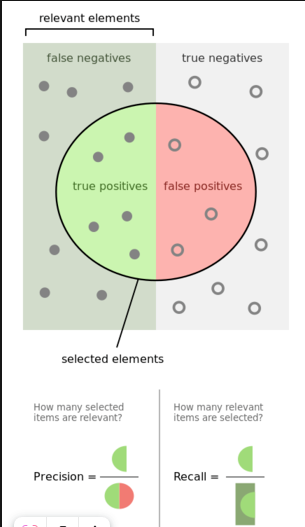

*F-score* - метрика объединяющая в себе точность и полноту, выдавая как результат их гармоническое среднее, а коэффициент $\beta$, позволяет балансировать вклад, вносимый точностью, тем самым акцентируя внимание на той метрике, максимизация которой для нас наиболее приоритетна.

Наиболее часто встречающаяся вариация данной метрики - это F1-score,<br> Если $\beta$ = 1, а влияние точности и полноты одинаково.<br>Если $\beta$ > 1 - смещение в сторону recall.<br>Если 0 < $\beta$ < 1 - смещение в сторону precision

<center>$\LARGE F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$<center>

Примеры:
1. Атомная электростанция, наш / не наш человек - максимизируем точность
2. Больница, болен / здоров - максимизируем полноту


**ROC-кривая + ROC-AUC**

Графичекая характеристика качества бинарного классификатора, отображает зависимость доли верных положительных классификаций *True Positive Rate (TPR)* от доли ложных положительных классификаций *False Positive Rate (FPR)*.

<center>$\large TPR = \LARGE \frac{TP}{TP \: + \: FN} \:\:\:\:\: \large FPR = \LARGE \frac{FP}{FP \: + \: TN}$<center>

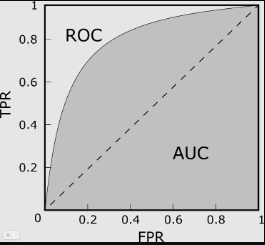

In [339]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [474]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

## Данные

In [475]:
iris = datasets.load_iris()

In [476]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [477]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

In [478]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Логистическая регрессия

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

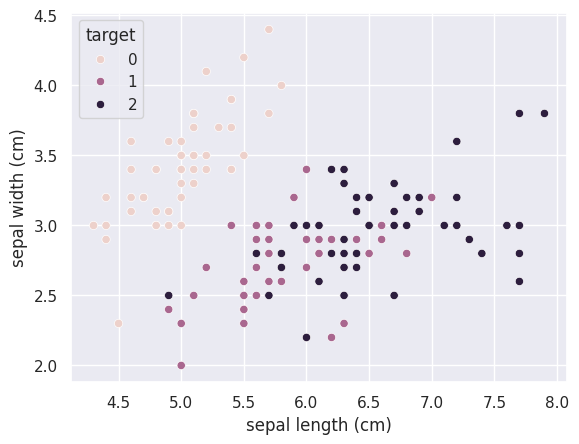

In [479]:
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['target'])

In [480]:
train_X = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y = iris_df[iris_df['target'].isin([0, 1])]['target']

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

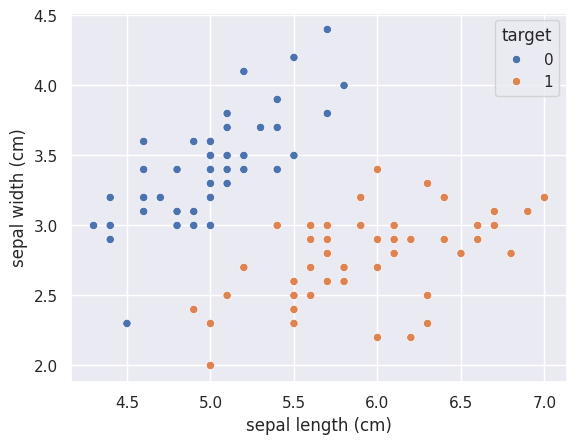

In [481]:
sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)

In [482]:
from sklearn.linear_model import LogisticRegression

In [483]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

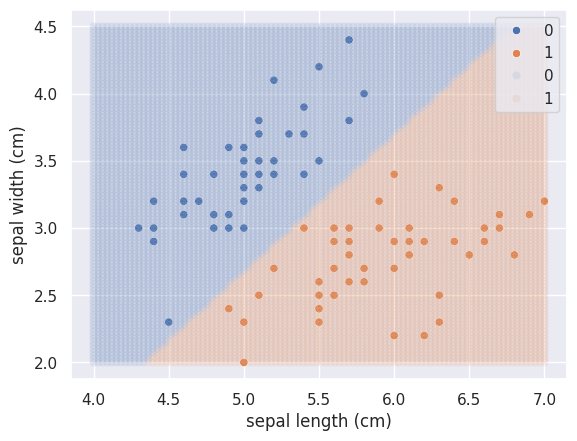

In [484]:
_x = np.linspace(4, 7, 100)
_y = np.linspace(2, 4.5, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = logreg.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)


## Регуляризация

In [485]:
train_X = np.linspace(-5, 5, 20).reshape(-1, 1)
train_y = np.hstack([np.zeros(10), np.ones(10)])

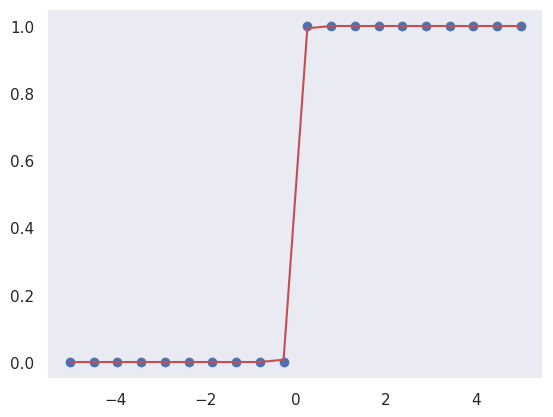

In [486]:
plt.scatter(train_X, train_y)
logreg = LogisticRegression(C=10000)
logreg.fit(train_X, train_y)
plt.plot(train_X, logreg.predict_proba(train_X)[:,1], c='r')
plt.grid()

[[0.18266487]]
[[0.63505381]]
[[1.46710291]]
[[3.2178808]]
[[7.27455959]]


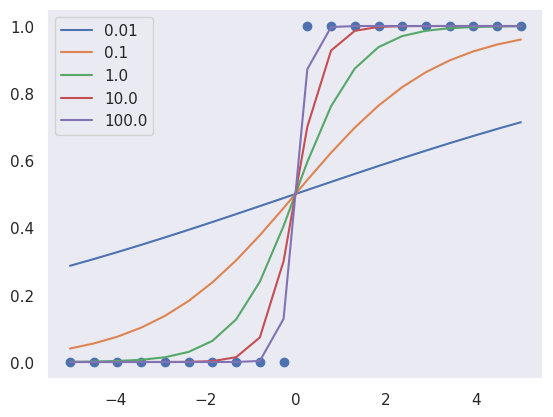

In [487]:
plt.scatter(train_X, train_y)
plt.grid()
for C in np.logspace(-2, 2, 5):
    logreg = LogisticRegression(C=C)
    logreg.fit(train_X, train_y)
    plt.plot(train_X, logreg.predict_proba(train_X)[:,1], label=C)
    print(logreg.coef_)
plt.legend()

Lasso регуляризатор
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)}) + \sum_{i=1}^n |b_i|$

Ridge регуляризатов
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)}) + \sum_{i=1}^n b_i^2$

### Коррелированные признаки

In [490]:
train_X_corr = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y_corr = iris_df[iris_df['target'].isin([0, 1])]['target']

In [491]:
train_X_corr['sepal width (cm) 2'] = train_X_corr['sepal width (cm)']*2

In [492]:
logreg = LogisticRegression(penalty='l1', C=100000000, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

array([[ 23.91128411, -11.13373086,  -5.05874084]])

In [494]:
train_X_corr

,sepal length (cm),sepal width (cm),sepal width (cm) 2
0,5.1,3.5,7.0
1,4.9,3.0,6.0
2,4.7,3.2,6.4
3,4.6,3.1,6.2
4,5.0,3.6,7.2
...,...,...,...
95,5.7,3.0,6.0
96,5.7,2.9,5.8
97,6.2,2.9,5.8
98,5.1,2.5,5.0


In [493]:
logreg = LogisticRegression(penalty='l1', C=1, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

array([[ 4.01686624,  0.        , -3.51734095]])

In [495]:
logreg = LogisticRegression(penalty='l2', C=1, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

array([[ 2.8975458 , -1.00713434, -2.01426867]])

## Подготовка признаков для регрессии

### Категориальные признаки
Заменять строковые значения порядковыми числами не всегда хорошая идея

1 < 2 < 3 < 4

Хотя иногда это может иметь смысл, в случае тех категорий которые мы можем однозначно отсортировать

например "ступень образования":

школа < колледж < вуз < аспирантура




Если у признака только 2 значения, можно их закодировать числами 0 и 1.  
Если больше 2 значений, то использовать one-hot encoding.

In [496]:
bin_feature = pd.Series(['male', 'male', 'female', 'female', 'female'])

In [497]:
bin_mapping = {'male': 0, 'female': 1}
bin_feature.map(bin_mapping)

,0
0,0
1,0
2,1
3,1
4,1


In [498]:
color = pd.Series(['red', 'red', 'green', 'blue', 'blue', 'red', 'black'])
color

,0
0,red
1,red
2,green
3,blue
4,blue
5,red
6,black


In [499]:
from sklearn.preprocessing import OneHotEncoder

In [500]:
one_hot = OneHotEncoder()
color_one_hot = one_hot.fit_transform(color.values.reshape(-1, 1))
color_one_hot

<7x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [501]:
color_one_hot.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

### Нормирование вещественных признаков

In [502]:
train_X = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_X['sepal width (mm)'] = train_X['sepal width (cm)'] * 10
train_X.drop(columns=['sepal width (cm)'], inplace=True)

train_y = iris_df[iris_df['target'].isin([0, 1])]['target']

In [503]:
train_X

,sepal length (cm),sepal width (mm)
0,5.1,35.0
1,4.9,30.0
2,4.7,32.0
3,4.6,31.0
4,5.0,36.0
...,...,...
95,5.7,30.0
96,5.7,29.0
97,6.2,29.0
98,5.1,25.0


In [504]:
logreg = LogisticRegression(C=0.1)
logreg.fit(train_X, train_y)

LogisticRegression(C=0.1)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (mm)'>

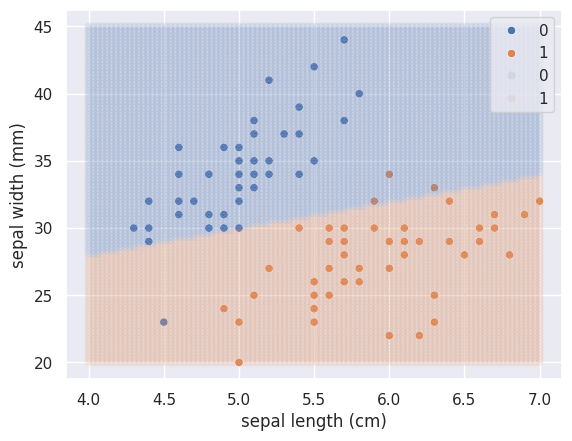

In [505]:
_x = np.linspace(4, 7, 100)
_y = np.linspace(20, 45, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = logreg.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (mm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)

StandardScaler - приводит значение признаков к среднему и нормирует на стандартное отклонение  
$X_i = \frac{x_i - mean(x)}{std(x)}$

In [506]:
train_X.agg(['mean', 'std'])

,sepal length (cm),sepal width (mm)
mean,5.471000,30.990000
std,0.641698,4.787389


In [507]:
from sklearn.preprocessing import StandardScaler

In [508]:
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
pd.DataFrame(train_X_scaled, columns=['sepal length (cm)', 'sepal width (mm)']).agg(['mean', 'std'])

,sepal length (cm),sepal width (mm)
mean,-1.518230e-15,3.474998e-16
std,1.005038e+00,1.005038e+00


<Axes: >

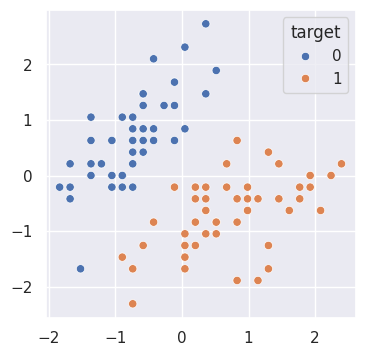

In [509]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=train_X_scaled[:,0], y=train_X_scaled[:,1], hue=train_y)

In [510]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [511]:
pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=0.1))])

In [512]:
pipeline.fit(train_X, train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=0.1))])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (mm)'>

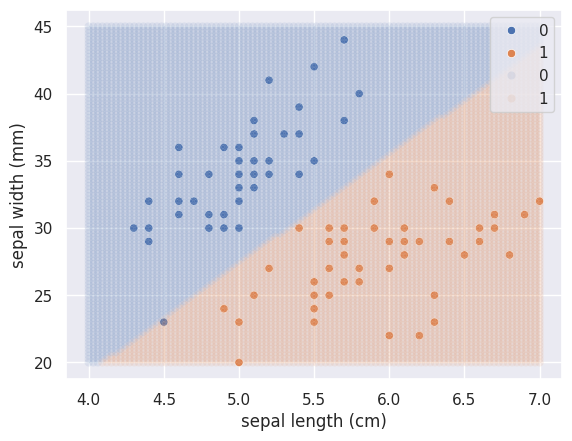

In [513]:
_pred = pipeline.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (mm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)

### Комбинирование признаков

In [514]:
circles_X, circles_y = datasets.make_circles(factor=0.5)
circles_X = pd.DataFrame(circles_X, columns=['x', 'y'])

<Axes: xlabel='x', ylabel='y'>

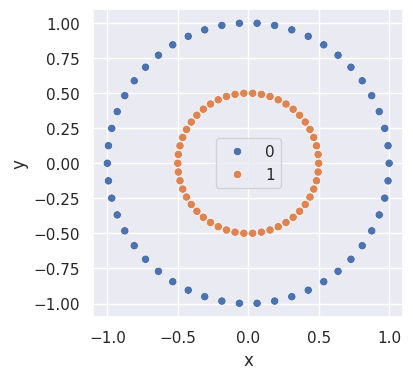

In [515]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=circles_X['x'], y=circles_X['y'], hue=circles_y)

In [516]:
circles_X

,x,y
0,-0.929776,0.368125
1,0.031395,0.499013
2,-0.535827,0.844328
3,-0.968583,0.248690
4,0.968583,0.248690
...,...,...
95,0.929776,-0.368125
96,0.438153,-0.240877
97,0.062791,-0.998027
98,0.464888,-0.184062


In [517]:
def make_polinomial(df):
    df = df.copy()
    df['x_x'] = df['x']**2
    df['y_y'] = df['y']**2
    df['x_y'] = df['x']*df['y']
    return df[['x_x', 'y_y']]

In [518]:
polinomial_X = make_polinomial(circles_X)

In [519]:
polinomial_X

,x_x,y_y
0,0.864484,0.135516
1,0.000986,0.249014
2,0.287110,0.712890
3,0.938153,0.061847
4,0.938153,0.061847
...,...,...
95,0.864484,0.135516
96,0.191978,0.058022
97,0.003943,0.996057
98,0.216121,0.033879


In [520]:
pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=100))])
pipeline.fit(polinomial_X, circles_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=100))])

<Axes: xlabel='x', ylabel='y'>

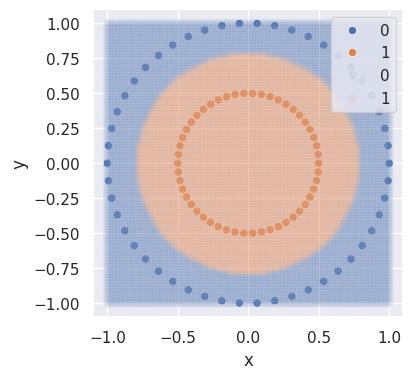

In [521]:
_x = np.linspace(-1, 1, 100)
_y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(_x, _y)
grid = pd.DataFrame(np.vstack([xv.flatten(), yv.flatten()]).T, columns=['x', 'y'])
polinomial_grid = make_polinomial(grid)
_pred = pipeline.predict(polinomial_grid)

plt.figure(figsize=(4, 4))
sns.scatterplot(x=circles_X['x'], y=circles_X['y'], hue=circles_y)
sns.scatterplot(x=grid['x'], y=grid['y'], hue=_pred, alpha=0.1)

# Основы EDA + Практика

**EDA** - Exploratory Data Analysis<a class='anchor' id='eda'>


**Зачем это?**
- Понимание, как устроены данные
- Проверка фичей на адекватность
- _Генерация новых фич_ - наибольший вклад в качество прогноза


In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

pd.set_option("future.no_silent_downcasting", True)

In [523]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shift_2025/default_dataset/weatherAUS.csv')

In [524]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [526]:
df = df[df['RainTomorrow'].notna()].copy()

In [527]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


In [528]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0}).astype(int)

In [529]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,110316
1,31877


In [530]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

cat_features = list(df.select_dtypes(include=['object']).columns)
X[cat_features] = X[cat_features].astype(str)

Попробуем сразу обучить модель :)

In [531]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

Text(0.5, 1.0, 'Количество наблюдений во времени')

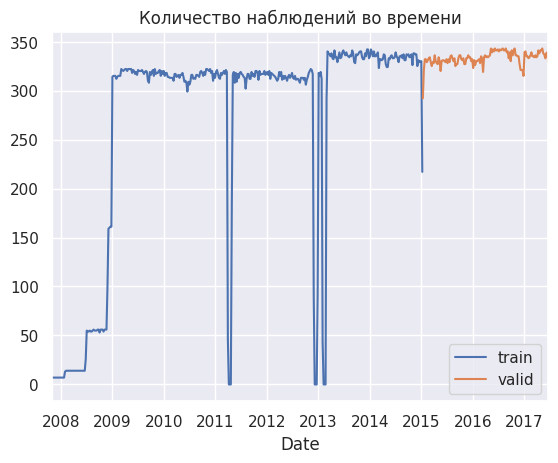

In [532]:
X_train.resample('7d', on='Date')['RainToday'].count().plot(label='train')
X_valid.resample('7d', on='Date')['RainToday'].count().plot(label='valid')
plt.legend()
plt.title('Количество наблюдений во времени')

In [533]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

X_train_num_features = X_train_num_features.fillna(0)
X_valid_num_features = X_valid_num_features.fillna(0)

In [534]:
# Обучение
model = LogisticRegression()
model.fit(
    X_train_num_features,
    y_train,
)
# Оценка
y_pred_proba = model.predict_proba(X_valid_num_features)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.7971264450121491


In [535]:
treshold = 0.5
print(classification_report(y_valid, (y_pred_proba[:, 1] > treshold).astype(int)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     33235
           1       0.62      0.42      0.50      9423

    accuracy                           0.81     42658
   macro avg       0.73      0.67      0.69     42658
weighted avg       0.80      0.81      0.80     42658



### **Стандартизация признаков**

In [536]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [537]:
df_to_stand = df.select_dtypes(include=['float64', 'float32', 'float16'])

In [538]:
df_to_stand.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
45587,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6
45588,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7
45589,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2
45590,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1
45591,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4


In [539]:
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min) -> [0, 1]
# StandardScaler() Для каждой фичи х делает: (x - mean) / std      -> mean = 0, std = 1
# RobustScaler() Для каждой фичи х делает: (x - Q1) / Q3 - Q1      -> mean = 0, std = 1

scaler = StandardScaler()
stand_features = scaler.fit_transform(df_to_stand)

In [540]:
stand_features

array([[-0.65379193,  0.15078353, -0.27760596, ...,  0.91774532,
        -0.39851874,  0.27571114],
       [ 0.28323077,  0.51607556,  0.14766743, ..., -0.55250965,
         0.07893208,  0.57841083],
       [ 0.23637963,  0.02433629,  0.14766743, ...,  0.91774532,
        -0.24450235, -0.21437408],
       ...,
       [-1.48149531, -0.45335328, -0.25397966, ...,         nan,
        -1.13779742, -0.32968825],
       [-1.41902713, -0.45335328, -0.27760596, ...,         nan,
        -1.41502693, -0.56031659],
       [-0.84119647, -0.52360175, -0.27760596, ..., -1.28763714,
        -0.78355972, -0.54590231]])

In [541]:
stand_features = pd.DataFrame(stand_features, columns=df_to_stand.columns)

In [542]:
stand_features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-0.653792,0.150784,-0.277606,-0.494167,-0.350351,-0.734747,-0.899777,0.154763,-0.044292,-1.081014,0.287982,-0.036694,0.887707,0.917745,-0.398519,0.275711
1,0.283231,0.516076,0.147667,-0.255419,0.548763,-0.072434,-1.124665,-0.186018,0.585589,-0.744438,-0.739399,-0.974641,0.194947,-0.552510,0.078932,0.578411
2,0.236380,0.024336,0.147667,0.078829,-1.143687,3.312719,-0.899777,-1.435548,0.690569,0.842276,-1.147536,-1.145176,1.234088,0.917745,-0.244502,-0.214374
3,0.173911,-1.085589,4.424028,0.413077,0.390096,1.031420,1.798883,0.609137,-0.359232,0.217206,-1.710484,-1.173599,-0.844195,0.917745,-0.537133,-1.093645
4,-0.716260,-1.001291,0.053162,0.031079,0.786764,0.737059,0.674441,1.063511,-0.044292,-0.119369,0.090950,0.460702,0.887707,0.917745,-0.906773,-0.906259


In [543]:
stand_features.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1.415560e+05,1.418710e+05,1.407870e+05,8.135000e+04,7.437700e+04,1.329230e+05,1.408450e+05,1.395630e+05,1.404190e+05,1.385830e+05,1.281790e+05,1.282120e+05,8.853600e+04,8.509900e+04,1.412890e+05,1.394670e+05
mean,1.638370e-16,2.628394e-16,-1.938023e-17,-1.376540e-16,-1.179636e-15,-1.881624e-16,1.614354e-17,-6.516732e-18,1.570674e-16,-7.219097e-17,2.838202e-16,-1.787252e-14,-1.714240e-16,-1.669920e-17,-3.363397e-16,-1.173819e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000006e+00,1.000007e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000006e+00,1.000006e+00,1.000004e+00,1.000004e+00
min,-3.230604e+00,-3.937677e+00,-2.776060e-01,-1.305911e+00,-2.016357e+00,-2.500914e+00,-1.574441e+00,-2.117109e+00,-3.613616e+00,-2.475399e+00,-5.228911e+00,-5.422780e+00,-1.536956e+00,-1.655201e+00,-3.725273e+00,-3.904427e+00
25%,-7.162601e-01,-7.483968e-01,-2.776060e-01,-6.851658e-01,-7.205748e-01,-6.611566e-01,-7.873324e-01,-6.403925e-01,-6.216824e-01,-6.963562e-01,-6.690301e-01,-6.904143e-01,-1.190575e+00,-9.200734e-01,-7.219532e-01,-7.332878e-01
50%,-2.911013e-02,-8.806126e-02,-2.776060e-01,-1.599194e-01,2.314285e-01,-7.243431e-02,-1.126677e-01,4.116906e-02,6.068847e-02,2.487746e-02,-7.565802e-03,-8.271485e-03,1.949466e-01,1.826178e-01,-4.428103e-02,-8.464564e-02
75%,7.205080e-01,6.987216e-01,-1.831008e-01,4.608263e-01,7.867638e-01,5.898783e-01,5.619971e-01,6.091370e-01,7.430593e-01,6.980289e-01,6.679722e-01,6.738714e-01,8.877074e-01,9.177453e-01,7.103993e-01,6.793107e-01
max,3.391023e+00,3.494611e+00,4.354918e+01,3.331260e+01,1.818101e+00,6.992233e+00,1.304330e+01,7.765533e+00,1.635390e+00,2.332825e+00,3.285682e+00,3.459288e+00,1.580468e+00,1.652873e+00,3.575104e+00,3.605408e+00


**Попробуем разные варианты**

In [544]:
X_train_num_features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
45587,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6
45588,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7
45589,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2
45590,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1
45591,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4


In [545]:
print(f'Общий размер выборки: {df.shape[0]}')
print(f'Размер тренировочной выборки: {X_train_num_features.shape[0]}')
print(f'Общий тестовой выборки: {X_valid_num_features.shape[0]}')

Общий размер выборки: 142193
Размер тренировочной выборки: 99535
Общий тестовой выборки: 42658


In [546]:
results = []
for scaler_name, scaler in [
    ('StandardScaler', StandardScaler()),
    ('RobustScaler', RobustScaler()), ## сходится хуже
    ('MinMaxScaler', MinMaxScaler()),
]:
    X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
    X_valid_num_features_stand = scaler.transform(X_valid_num_features)

    model = LogisticRegression(max_iter=200)
    model.fit(
        X_train_num_features_stand,
        y_train,
    )
    y_pred_proba = model.predict_proba(X_valid_num_features_stand)
    roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

    results.append({
        'scaler_name': scaler_name,
        'ROC AUC Score': roc_auc,
    })
pd.DataFrame(results)

,scaler_name,ROC AUC Score
0,StandardScaler,0.806425
1,RobustScaler,0.806435
2,MinMaxScaler,0.805606


## Обработка пропусков

Основные варианты:
1. Выкинуть эти данные (удалить строки, удалить признак целиком)
2. Заменять пропуски разными методами (медиана, средняя, мода, константа и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать
5. Заполнять эвристикой
6. Заполнять на основе скоррелированных признаков
7. Обучить модель на заполнение пропусков*



In [547]:
df.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39537,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30175,False,False,False,False,False,True,True,False,False,True,...,False,False,False,False,True,True,False,False,False,False
27166,False,False,False,False,False,True,True,False,False,False,...,False,False,True,True,True,True,False,False,False,False


In [548]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [549]:
df.dropna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,1
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,1
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,1
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,1
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67199,2017-06-25,MelbourneAirport,5.5,13.9,0.0,2.8,3.8,NNW,44.0,N,...,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,0
80997,2017-06-25,Watsonia,7.9,13.0,0.0,2.8,3.8,NNW,39.0,N,...,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,0
87199,2017-06-25,Brisbane,11.0,24.2,0.0,2.2,9.8,ENE,20.0,SSW,...,68.0,53.0,1020.5,1017.3,6.0,3.0,15.9,22.6,No,0
33519,2017-06-25,Sydney,7.6,19.3,0.0,3.4,9.4,W,35.0,W,...,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,0


In [550]:
df_to_test_filling = df.copy()

In [551]:
df_to_test_filling['Sunshine_nan'] = 0
df_to_test_filling.loc[df['Sunshine'].isna(), 'Sunshine_nan'] = 1

In [552]:
df_to_test_filling[df_to_test_filling['Sunshine_nan'] == 1][['Sunshine', 'Sunshine_nan']]

,Sunshine,Sunshine_nan
45808,NaN,1
84015,NaN,1
129892,NaN,1
45887,NaN,1
129912,NaN,1
...,...,...
45586,NaN,1
42546,NaN,1
39537,NaN,1
30175,NaN,1


In [553]:
df_to_test_filling['Sunshine_nan'].value_counts()

,count
Sunshine_nan,
0,74377
1,67816


Простые варианты заполнения пропусков:

**для числовых признаков**
* среднее (плохо работает с выбросами)
* медиана (более утойчива к выбросам)
* заполнить нулями (может поехать признак)
* заполнить исходя из значений скоррелированных признаков

**для категориальных признаков**
* мода
* новая категория

In [554]:
median = df_to_test_filling['Evaporation'].median()
df_to_test_filling['Evaporation_filled'] = df_to_test_filling['Evaporation'].fillna(median)

In [555]:
df_to_test_filling[df_to_test_filling['Evaporation'].isna()][['Evaporation', 'Evaporation_filled']]

,Evaporation,Evaporation_filled
30180,NaN,4.8
96325,NaN,4.8
96332,NaN,4.8
96339,NaN,4.8
96345,NaN,4.8
...,...,...
45586,NaN,4.8
42546,NaN,4.8
39537,NaN,4.8
30175,NaN,4.8


Попробуем заполнить средним

In [556]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
for col in X_train_num_features.columns:
    X_train_num_features[col] = X_train_num_features[col].fillna(train_mean[col])
    X_valid_num_features[col] = X_valid_num_features[col].fillna(train_mean[col])

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.853453244217848


## Обработка выбросов

**Выбросы** - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [557]:
df_to_test_filling.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Sunshine_nan,Evaporation_filled
count,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,2013-04-01 00:28:51.730816512,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.224181,0.476929,5.183213
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,2011-01-06 00:00:00,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000,4.000000
50%,2013-05-27 00:00:00,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,4.800000
75%,2015-06-12 00:00:00,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,1.000000,5.400000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,145.000000
std,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.417043,0.499469,3.185401


<Axes: >

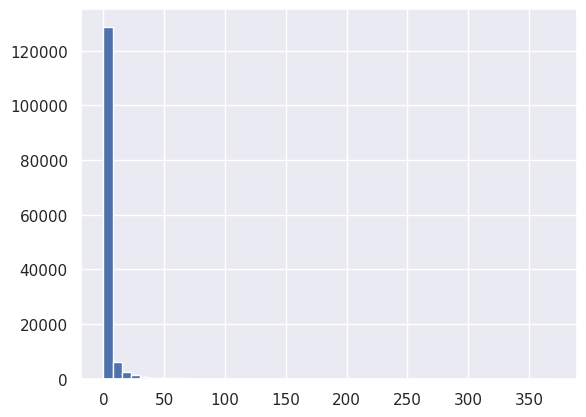

In [558]:
df_to_test_filling['Rainfall'].hist(bins=50)

In [559]:
df_to_test_filling['Rainfall_outlier'] = 0
df_to_test_filling.loc[df_to_test_filling['Rainfall'] > 50, 'Rainfall_outlier'] = 1

In [560]:
df_to_test_filling.loc[df['Rainfall'] > 50, 'Rainfall'] = df_to_test_filling['Rainfall'].median()

In [561]:
df_to_test_filling[df_to_test_filling['Rainfall_outlier'] == 1]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Sunshine_nan,Evaporation_filled,Rainfall_outlier
30180,2008-02-05,Sydney,19.7,25.7,0.0,NaN,0.0,NaN,NaN,NNE,...,1004.8,8.0,8.0,22.5,25.5,Yes,1,0,4.8,1
30394,2008-09-06,Sydney,11.8,14.2,0.0,NaN,0.0,NaN,NaN,S,...,1013.1,8.0,8.0,13.0,12.3,Yes,1,0,4.8,1
139217,2008-10-15,Darwin,22.1,34.3,0.0,12.4,5.5,E,102.0,S,...,1008.2,7.0,6.0,26.9,34.0,Yes,1,0,12.4,1
84148,2008-11-19,Brisbane,18.2,28.7,0.0,2.8,8.1,NE,28.0,SW,...,1008.5,8.0,7.0,22.0,26.8,Yes,1,0,2.8,1
84149,2008-11-20,Brisbane,18.4,29.2,0.0,6.2,8.6,W,72.0,SW,...,1001.8,2.0,7.0,23.9,27.1,Yes,1,0,6.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12051,2017-06-10,CoffsHarbour,14.0,19.0,0.0,NaN,NaN,ESE,44.0,SSW,...,1026.2,8.0,7.0,14.3,16.6,Yes,1,1,4.8,1
12052,2017-06-11,CoffsHarbour,14.2,17.5,0.0,NaN,NaN,ENE,35.0,WNW,...,1024.1,8.0,8.0,16.3,16.6,Yes,1,1,4.8,1
93266,2017-06-12,GoldCoast,15.7,21.8,0.0,NaN,NaN,SE,67.0,S,...,1017.2,NaN,NaN,17.5,19.8,Yes,1,1,4.8,1
12054,2017-06-13,CoffsHarbour,14.4,21.2,0.0,NaN,NaN,SW,50.0,SW,...,1024.4,4.0,1.0,16.6,20.5,Yes,1,1,4.8,1


**WindGustSpeed**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

<Axes: >

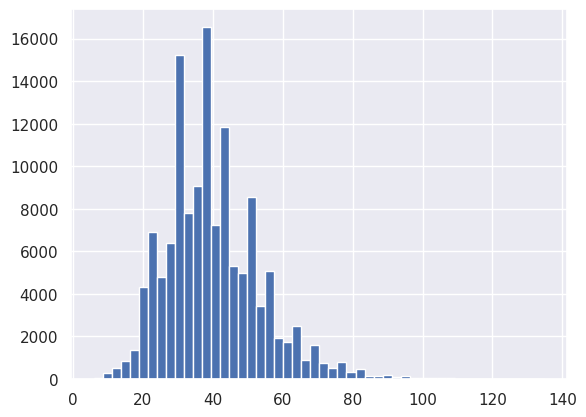

In [562]:
df_to_test_filling['WindGustSpeed'].hist(bins=50)

In [563]:
df_to_test_filling['WindGustSpeed'].describe()

,WindGustSpeed
count,132923.000000
mean,39.984292
std,13.588801
min,6.000000
25%,31.000000
50%,39.000000
75%,48.000000
max,135.000000


In [564]:
np.quantile(df_to_test_filling['WindGustSpeed'], q=0.975)

nan

In [565]:
wind_gust_speed_max_value = np.quantile(df_to_test_filling['WindGustSpeed'].fillna(df_to_test_filling['WindGustSpeed'].mean()), q=0.975)
wind_gust_speed_max_value

72.0

In [566]:
wind_gust_speed_min_value = np.quantile(df_to_test_filling['WindGustSpeed'].fillna(df_to_test_filling['WindGustSpeed'].mean()), q=0.025)
wind_gust_speed_min_value

19.0

In [567]:
condition = (df_to_test_filling['WindGustSpeed'] > wind_gust_speed_max_value) | (df_to_test_filling['WindGustSpeed'] < wind_gust_speed_min_value)
df_to_test_filling[condition]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Sunshine_nan,Evaporation_filled,Rainfall_outlier
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,1007.2,8.0,7.0,15.4,20.2,Yes,1,0,5.8,0
45638,2007-12-22,Canberra,19.9,22.0,11.0,4.4,5.9,NNW,76.0,N,...,996.8,8.0,3.0,20.6,19.6,Yes,1,0,4.4,0
45740,2008-04-02,Canberra,5.3,23.3,0.0,3.6,5.6,NNW,83.0,SSW,...,1010.5,1.0,8.0,9.5,22.5,No,1,0,3.6,0
45747,2008-04-09,Canberra,5.6,19.5,0.0,2.8,6.8,SW,17.0,S,...,1021.8,6.0,4.0,14.3,18.6,No,0,0,2.8,0
45777,2008-05-09,Canberra,0.1,21.0,0.0,2.2,9.2,NNW,17.0,WNW,...,1020.3,0.0,1.0,7.6,20.7,No,0,0,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87198,2017-06-24,Brisbane,10.4,24.5,0.0,3.4,8.9,S,17.0,S,...,1015.4,7.0,5.0,14.3,24.0,No,0,0,3.4,0
99511,2017-06-24,Adelaide,5.0,17.3,0.0,NaN,NaN,W,17.0,NaN,...,1018.5,NaN,NaN,9.6,16.7,No,0,1,4.8,0
73400,2017-06-24,Mildura,2.9,18.2,0.0,2.8,8.3,SSW,15.0,NaN,...,1018.3,0.0,NaN,7.4,16.6,No,0,0,2.8,0
12066,2017-06-25,CoffsHarbour,8.5,19.3,0.0,NaN,NaN,NW,17.0,WSW,...,1017.0,7.0,8.0,13.3,18.2,No,0,1,4.8,0


In [568]:
df_to_test_filling.loc[condition, 'WindGustSpeed'] = df_to_test_filling['WindGustSpeed'].median()
df_to_test_filling['WindGustSpeed'].describe()

,WindGustSpeed
count,132923.000000
mean,39.554878
std,11.333324
min,19.000000
25%,31.000000
50%,39.000000
75%,46.000000
max,72.000000


<Axes: >

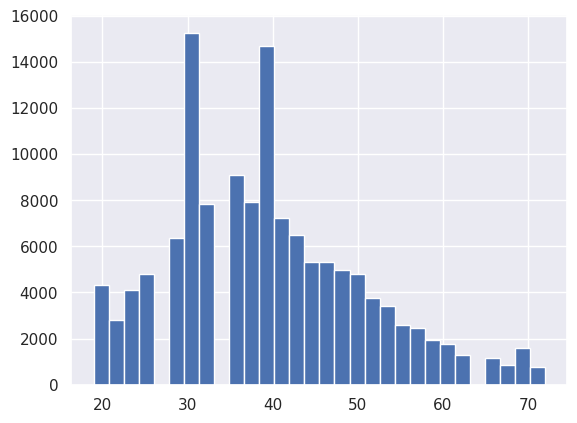

In [569]:
df_to_test_filling['WindGustSpeed'].hist(bins=30)

## Генерация новых признаков

In [571]:
X_train['TempDiff'] = X_train['MaxTemp'] - X_train['MinTemp']
X_valid['TempDiff'] = X_valid['MaxTemp'] - X_valid['MinTemp']

X_train['month'] = X_train['Date'].dt.month
X_valid['month'] = X_valid['Date'].dt.month

In [572]:
X_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,TempDiff,month
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,16.3,11
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,12.9,11
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,9.7,11
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,2.2,11
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,8.5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77093,2015-01-12,Portland,15.8,26.9,0.0,4.0,10.3,E,37.0,ENE,...,58.0,1013.9,1009.3,4.0,NaN,18.7,24.7,No,11.1,1
141408,2015-01-12,Darwin,26.7,32.7,5.6,3.2,7.7,W,41.0,W,...,69.0,1007.9,1004.2,7.0,7.0,29.7,31.9,Yes,6.0,1
8162,2015-01-12,Cobar,20.4,24.7,15.2,1.0,NaN,ENE,33.0,E,...,87.0,1008.7,1007.2,8.0,8.0,22.5,22.9,Yes,4.3,1
14180,2015-01-12,Moree,20.7,29.6,2.4,5.8,0.5,ESE,35.0,E,...,54.0,1010.0,1007.3,7.0,7.0,21.7,28.7,Yes,8.9,1


In [573]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.853491433923005


In [574]:
X_train['RainToday_category'] = X_train['RainToday'].replace({'Yes': 1, 'No': 0, 'nan': 0}).astype(int)
X_valid['RainToday_category'] = X_valid['RainToday'].replace({'Yes': 1, 'No': 0, 'nan': 0}).astype(int)

X_train['rain_count_from_month_start'] = X_train.groupby(['Location', 'month'])['RainToday_category'].cumsum()
X_valid['rain_count_from_month_start'] = X_valid.groupby(['Location', 'month'])['RainToday_category'].cumsum()

In [575]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8551434835279196


In [576]:
{name: round(coef, 3) for name, coef in zip(X_train_num_features.columns, model.coef_[0])}

{'MinTemp': -0.055,
 'MaxTemp': -0.117,
 'Rainfall': 0.098,
 'Evaporation': 0.023,
 'Sunshine': -0.361,
 'WindGustSpeed': 0.668,
 'WindSpeed9am': -0.082,
 'WindSpeed3pm': -0.181,
 'Humidity9am': 0.088,
 'Humidity3pm': 1.102,
 'Pressure9am': 0.737,
 'Pressure3pm': -1.134,
 'Cloud9am': -0.051,
 'Cloud3pm': 0.295,
 'Temp9am': 0.055,
 'Temp3pm': 0.164,
 'TempDiff': -0.041,
 'month': 0.051,
 'RainToday_category': 0.21,
 'rain_count_from_month_start': 0.09}

**Feature discretization/binarization** <a class='acnhor' id='feature_discretization'>

**Категория давления (0-100)**

1 категория - низкое давление (до 1000),<br>2 среднее - от 1000 до 1030<br>...

**Бинаризация**

1 - до 1000

0 - более 1000

<Axes: >

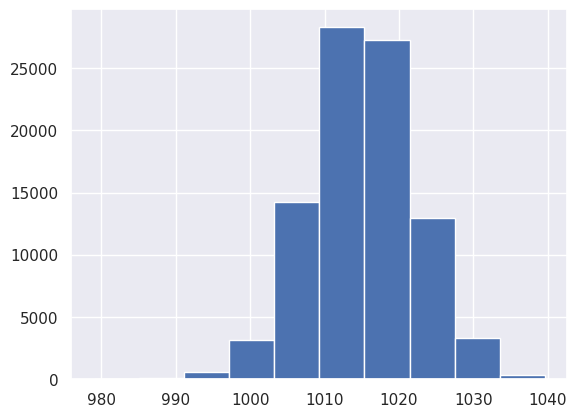

In [577]:
X_train['Pressure3pm'].hist()

In [578]:
def age_to_cat(X):

    X['Pressure3pm_cat'] = 0

    X.loc[X['Pressure3pm'] <= 1000, 'Pressure3pm_cat'] = 1
    X.loc[(X['Pressure3pm'] > 1000) & (X['Pressure3pm'] <= 1030), 'Pressure3pm_cat'] = 2
    X.loc[(X['Pressure3pm'] > 1030), 'Pressure3pm_cat'] = 3

    return X

def age_to_binary_cat(X):

    X['Pressure3pm_binary_cat'] = 0
    X.loc[X['Pressure3pm'] <= 1000, 'Pressure3pm_binary_cat'] = 1

    return X

In [579]:
X_train = age_to_cat(X_train)
X_train = age_to_binary_cat(X_train)

X_valid = age_to_cat(X_valid)
X_valid = age_to_binary_cat(X_valid)

In [580]:
X_train_num_features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,TempDiff,month,RainToday_category,rain_count_from_month_start
45587,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,16.3,11,0,0
45588,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,12.9,11,1,1
45589,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,9.7,11,1,2
45590,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,2.2,11,1,3
45591,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,8.5,11,1,4


In [581]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8550701471601652


**Работа с категориями**

Если у признака только 2 значения, можно их закодировать числами 0 и 1.

In [582]:
X_train[cat_features]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
45587,Canberra,NW,SW,NW,No
45588,Canberra,ENE,E,W,Yes
45589,Canberra,NW,N,NNE,Yes
45590,Canberra,NW,WNW,W,Yes
45591,Canberra,SSE,SSE,ESE,Yes
...,...,...,...,...,...
77093,Portland,E,ENE,SE,No
141408,Darwin,W,W,W,Yes
8162,Cobar,ENE,E,E,Yes
14180,Moree,ESE,E,SE,Yes


Заменять строковые значения порядковыми числами не всегда хорошая идея

1 < 2 < 3 < 4

Хотя иногда это может иметь смысл, в случае тех категорий которые мы можем однозначно отсортировать

например "ступень образования":

школа < колледж < вуз < аспирантура

**A) Бинарные (дамми) переменные**<a class='anchor' id='dummy'>

In [583]:
X_train['Location'].nunique()

49

In [584]:
X_train['Location'].value_counts().head()

,count
Location,
Canberra,2529
Sydney,2442
Perth,2298
Darwin,2298
Hobart,2294


In [585]:
pd.get_dummies(df['Location'], dtype=int)

,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
45587,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45588,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45589,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45590,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45591,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
33519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [586]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['Location'], dtype=int)], axis=1)
display(X_train.head())

X_valid = pd.concat([X_valid, pd.get_dummies(X_valid['Location'], dtype=int)], axis=1)
display(X_valid.head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,0,0,0,0,0,0,0,0,0,0
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,0,0,0,0,0,0,0,0,0,0
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,0,0,0,0,0,0,0,0,0,0
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,0,0,0,0,0,0,0,0,0,0
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,0,0,0,0,0,0,0,0,0,0


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
41651,2015-01-12,Williamtown,20.5,25.4,25.0,24.4,NaN,S,57.0,SSW,...,0,0,0,0,0,0,1,0,0,0
95424,2015-01-12,Townsville,25.3,31.6,0.0,9.6,12.0,NE,37.0,ESE,...,1,0,0,0,0,0,0,0,0,0
98617,2015-01-12,Adelaide,18.3,29.9,0.0,9.0,NaN,N,31.0,ENE,...,0,0,0,0,0,0,0,0,0,0
107675,2015-01-12,Woomera,19.6,27.9,2.6,6.8,1.5,ESE,31.0,ESE,...,0,0,0,0,0,0,0,0,0,1
86304,2015-01-12,Brisbane,22.5,30.4,14.6,4.2,1.1,ESE,31.0,SW,...,0,0,0,0,0,0,0,0,0,0


In [587]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8593190360464996


## Основы визуализации данных

In [588]:
df[[feature for feature in df.columns if feature not in cat_features]]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
45587,2007-11-01,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,1
45588,2007-11-02,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1
45589,2007-11-03,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1
45590,2007-11-04,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,1
45591,2007-11-05,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39537,2017-06-25,-0.1,12.7,0.0,NaN,NaN,19.0,2.0,13.0,92.0,54.0,1020.8,1018.5,8.0,8.0,4.0,10.7,0
33519,2017-06-25,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0
30175,2017-06-25,2.7,20.0,0.2,NaN,NaN,37.0,0.0,19.0,88.0,35.0,1018.8,1015.2,NaN,NaN,9.6,19.4,0
27166,2017-06-25,3.1,20.0,0.0,NaN,NaN,28.0,2.0,11.0,95.0,45.0,NaN,NaN,NaN,NaN,7.8,17.8,0


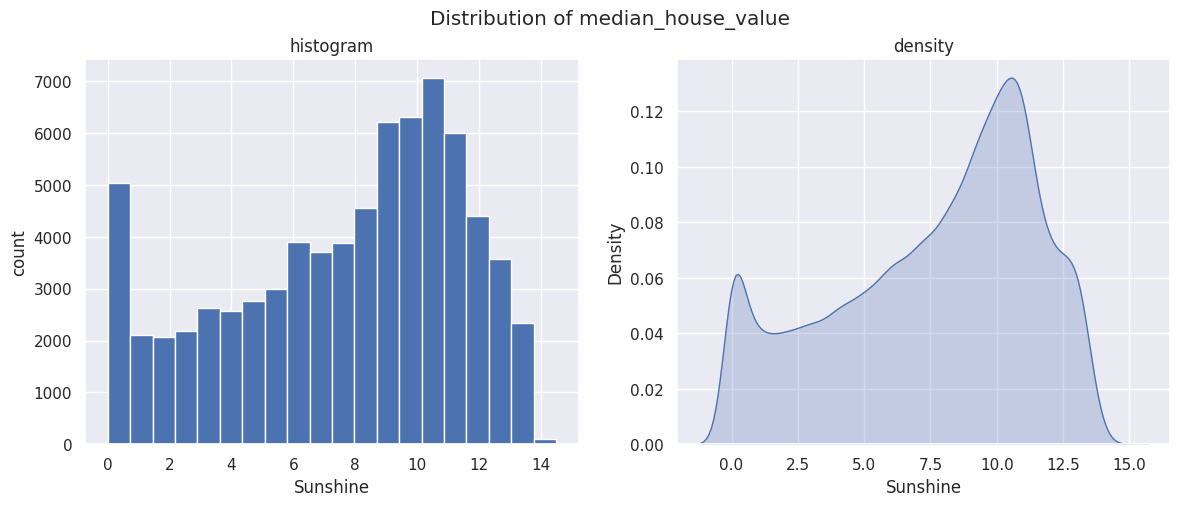

In [589]:
plt.figure(figsize=(14, 5))
feature = 'Sunshine'

plt.subplot(121)
df[feature].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel(feature)
plt.title('histogram')

plt.subplot(122)
sns.kdeplot(df[feature], fill=True, legend=False)
plt.xlabel(feature)
plt.title('density')

plt.suptitle('Distribution of median_house_value')
plt.show()

Различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

In [590]:
target_mean = round(df[feature].mean(), 2)
target_median = df[feature].median()
target_mode = df[feature].mode()[0]

In [591]:
target_mean

7.62

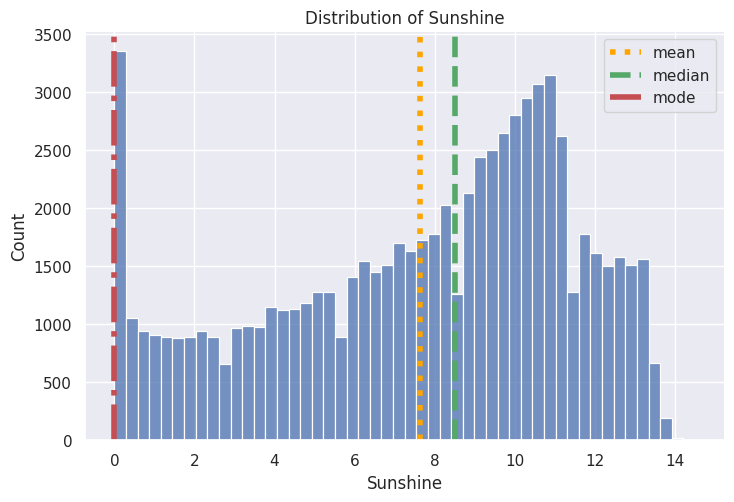

In [592]:
graph = sns.displot(df[feature], bins=50, height=5, aspect=1.5)

plt.axvline(target_mean, label='mean', linestyle=':', linewidth=4, color='orange')
plt.axvline(target_median, label='median', linestyle='--', linewidth=4, color='g')
plt.axvline(target_mode, label='mode', linestyle='-.', linewidth=4, color='r')

plt.title(f'Distribution of {feature}')
plt.legend()
plt.show()

Попробуем не учитывать 0

In [593]:
target_mean_adjusted = df[df[feature] > 0][feature].mean()
target_median_adjusted = df[df[feature] > 0][feature].median()
target_mode_adjusted = df[df[feature] > 0][feature].mode()[0]

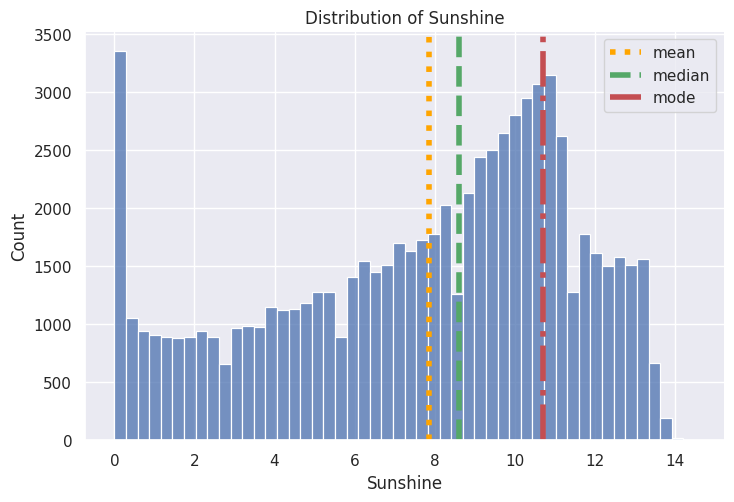

In [594]:
graph = sns.displot(df[df[feature] < 500_000][feature], bins=50, height=5, aspect=1.5)

plt.axvline(target_mean_adjusted, label='mean', linestyle=':', linewidth=4, color='orange')
plt.axvline(target_median_adjusted, label='median', linestyle='--', linewidth=4, color='g')
plt.axvline(target_mode_adjusted, label='mode', linestyle='-.', linewidth=4, color='r')

plt.title(f'Distribution of {feature}')
plt.legend()
plt.show()

Можем также проверить распределение фичи на нормальность, что может быть полезно для линейных моделей

In [595]:
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

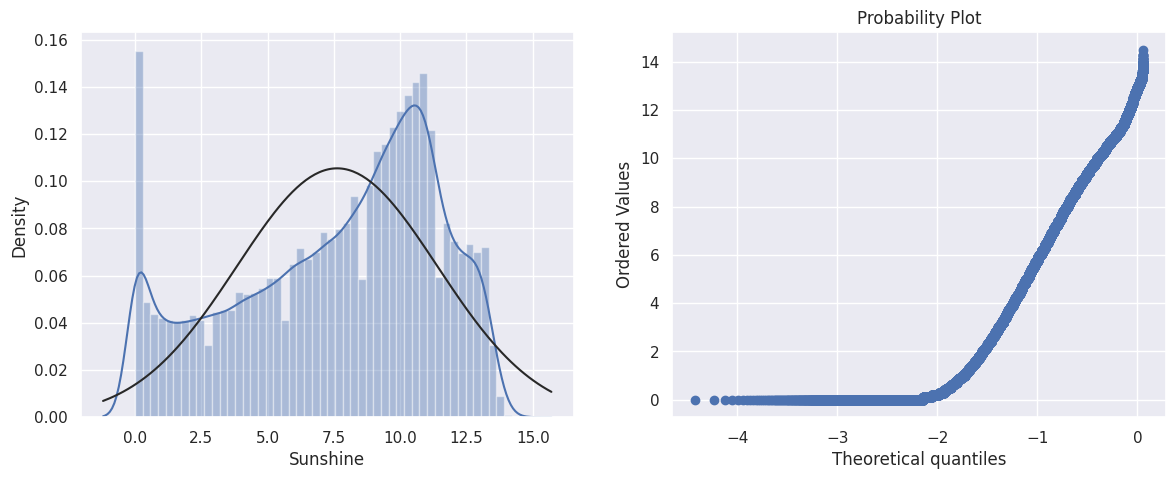

In [596]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(df[feature], fit=norm)
plt.subplot(122)
stats.probplot(df[feature], plot=plt)
plt.show()

Можно попробовать применить нелинейное преобразование:
например логарифмирование, корень, обратную величину и т д

In [597]:
df[f'{feature}_2'] = df[feature] ** 2

In [598]:
df[f'{feature}_2'].fillna(target_mean_adjusted).astype(float)

,Sunshine_2
45587,39.690000
45588,94.090000
45589,10.890000
45590,82.810000
45591,112.360000
...,...
39537,7.869038
33519,88.360000
30175,7.869038
27166,7.869038


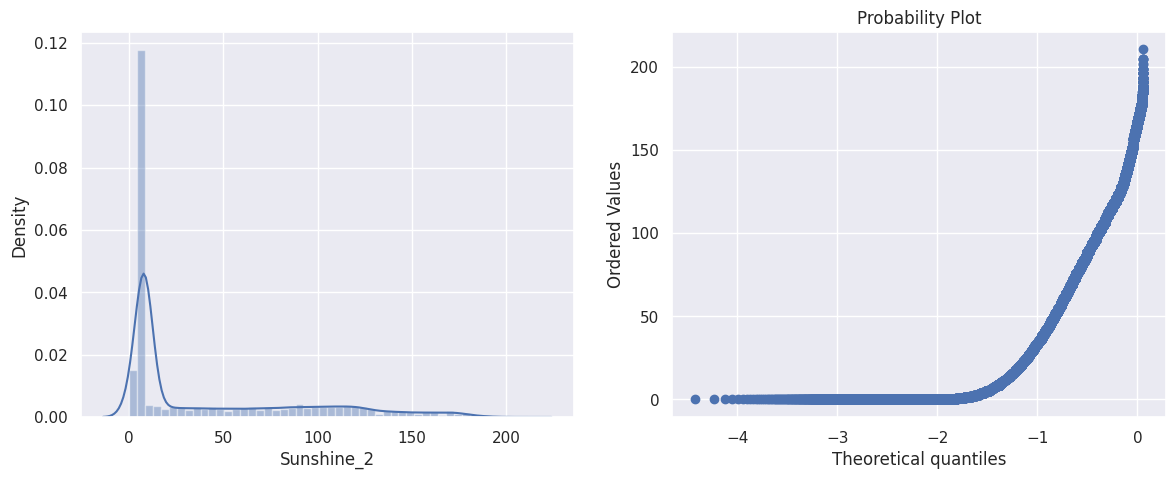

In [599]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(df[f'{feature}_2'].fillna(target_mean_adjusted).astype(float))
plt.subplot(122)
stats.probplot(df[f'{feature}_2'], plot=plt)
plt.show()

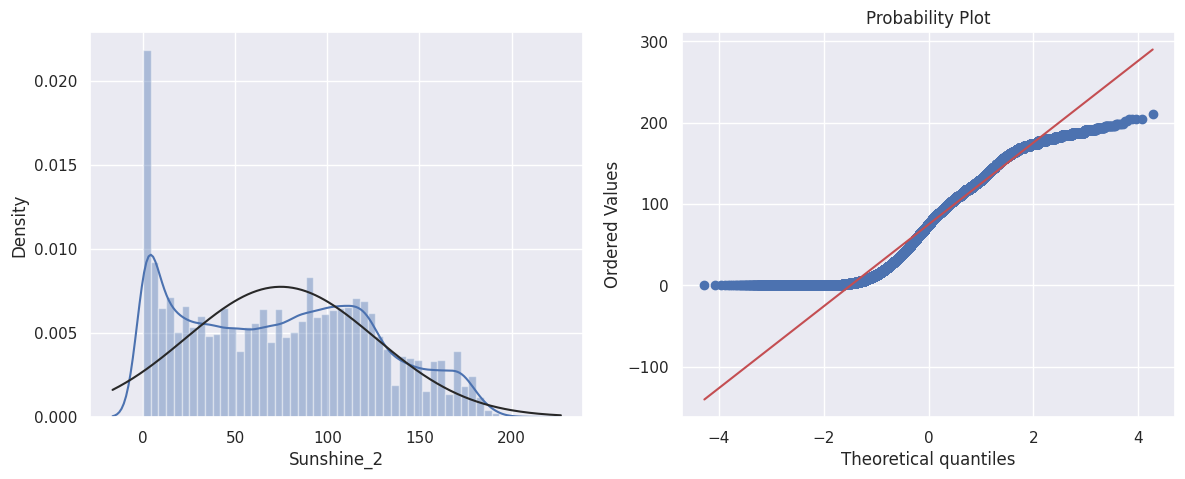

In [600]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(df[df[feature] > 0][f'{feature}_2'], fit=norm);
plt.subplot(122)
stats.probplot(df[df[feature] > 0][f'{feature}_2'], plot=plt)
plt.show()

### Анализ признаков

#### Количественные признаки

In [601]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])

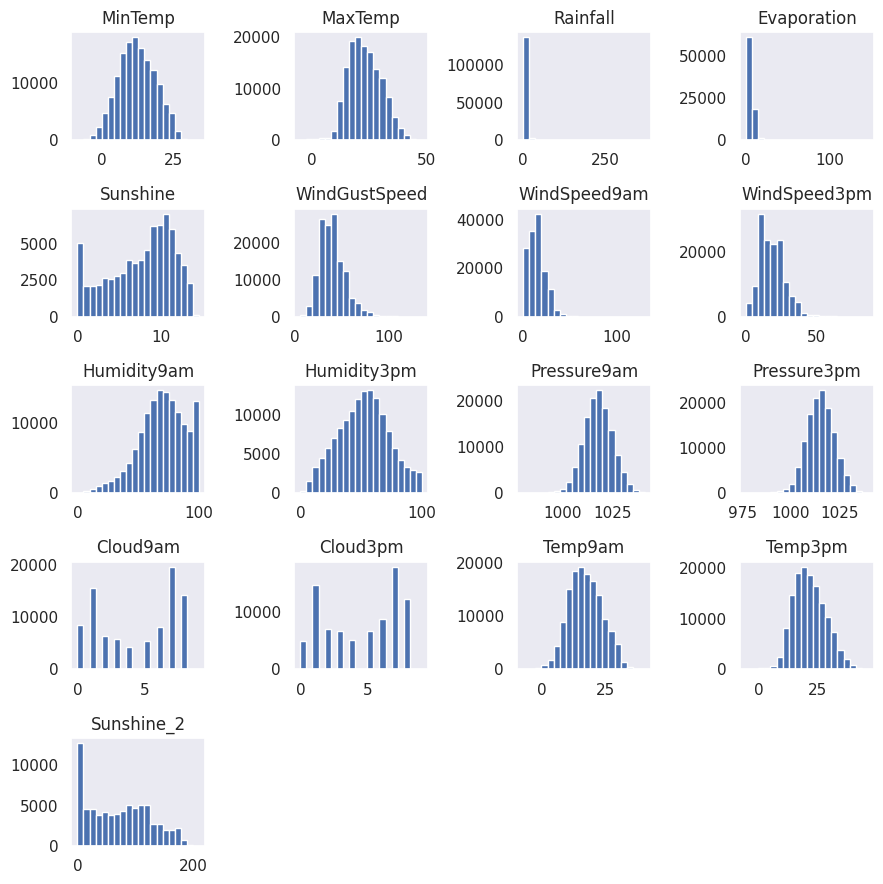

In [602]:
df_num_features.hist(figsize=(9,9), bins=20, grid=False)
plt.tight_layout()

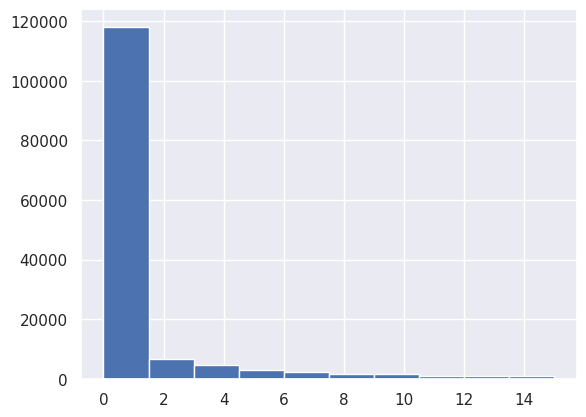

In [603]:
df.loc[df['Rainfall'] > 15, 'Rainfall'] = df['Rainfall'].median()
df['Rainfall'].hist();

In [463]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Sunshine_2
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,1,39.69
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,1,94.09
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,1,10.89
45590,2007-11-04,Canberra,13.3,15.5,0.0,7.2,9.1,NW,54.0,WNW,...,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,1,82.81
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,0,112.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39537,2017-06-25,WaggaWagga,-0.1,12.7,0.0,NaN,NaN,SSW,19.0,SSW,...,54.0,1020.8,1018.5,8.0,8.0,4.0,10.7,No,0,NaN
33519,2017-06-25,Sydney,7.6,19.3,0.0,3.4,9.4,W,35.0,W,...,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,0,88.36
30175,2017-06-25,Richmond,2.7,20.0,0.2,NaN,NaN,W,37.0,NaN,...,35.0,1018.8,1015.2,NaN,NaN,9.6,19.4,No,0,NaN
27166,2017-06-25,Penrith,3.1,20.0,0.0,NaN,NaN,SW,28.0,SE,...,45.0,NaN,NaN,NaN,NaN,7.8,17.8,No,0,NaN


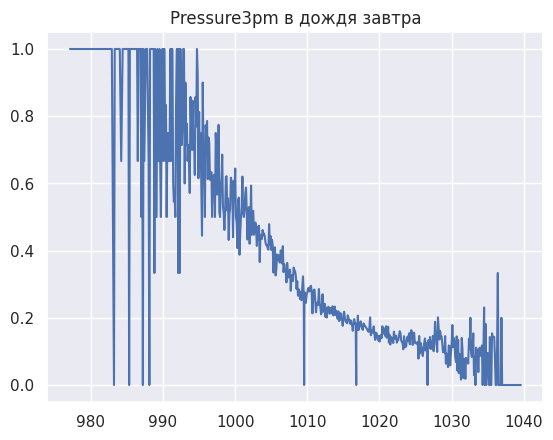

In [604]:
plt.plot(df.groupby('Pressure3pm')['RainTomorrow'].mean())
plt.title('Pressure3pm в дождя завтра')
plt.show()

<BarContainer object of 16 artists>

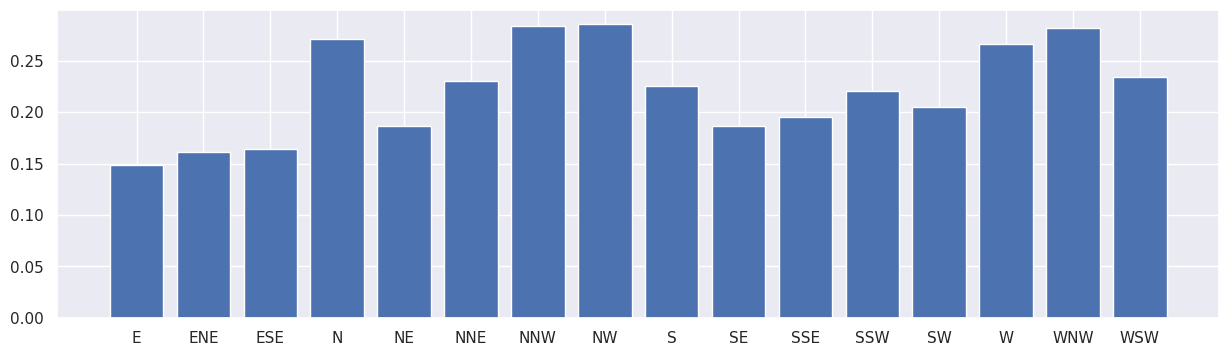

In [605]:
wind_dir_to_target = df.groupby('WindGustDir')['RainTomorrow'].mean()

plt.figure(figsize=(15,4))
plt.bar(wind_dir_to_target.index, wind_dir_to_target.values)

**Связанные (скоррелированные) признаки**

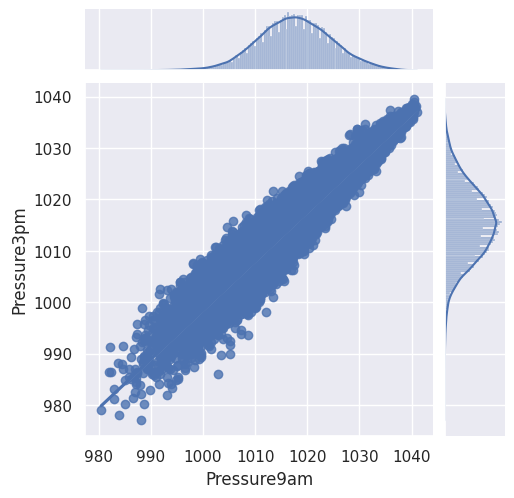

In [606]:
grid = sns.jointplot(data=df, x='Pressure9am', y='Pressure3pm', kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

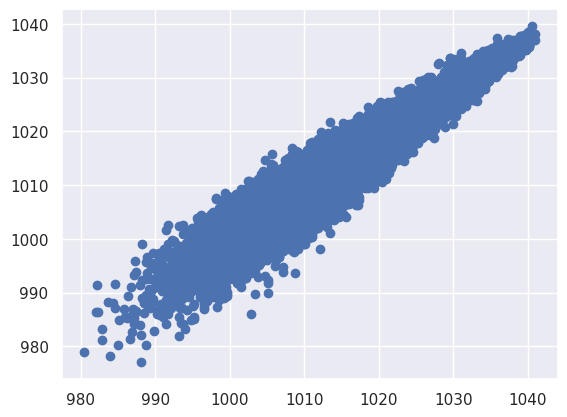

In [607]:
# похожий график через matplotlib
plt.scatter(df['Pressure9am'], df['Pressure3pm'])

#### Категориальные признаки

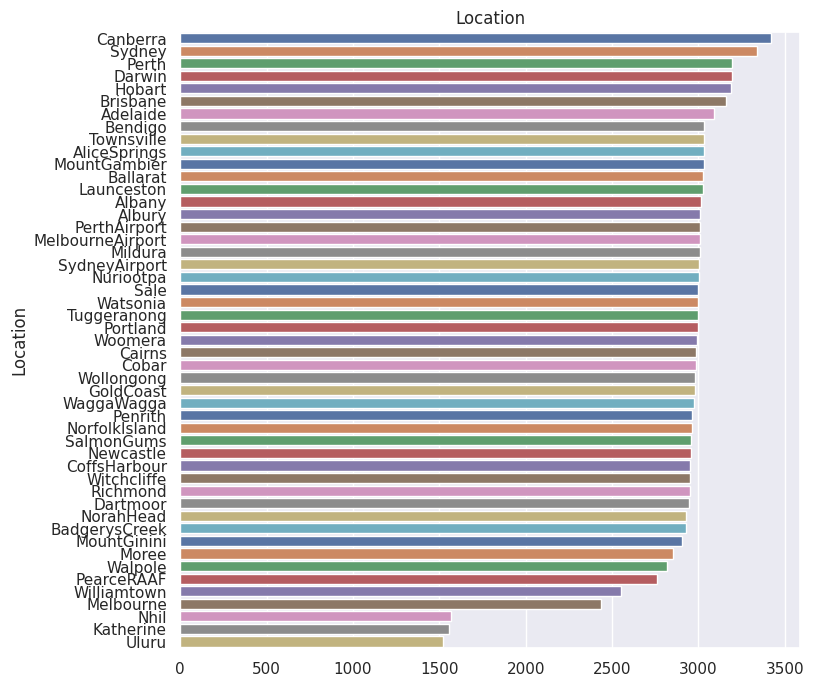

In [608]:
plt.figure(figsize=(8,8))
locatin_vc = df['Location'].value_counts()
sns.barplot(x=locatin_vc.values, y=locatin_vc.index, palette=sns.color_palette(), )
plt.title('Location')
plt.show()

**Как строится box plot**  

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25),
- ...

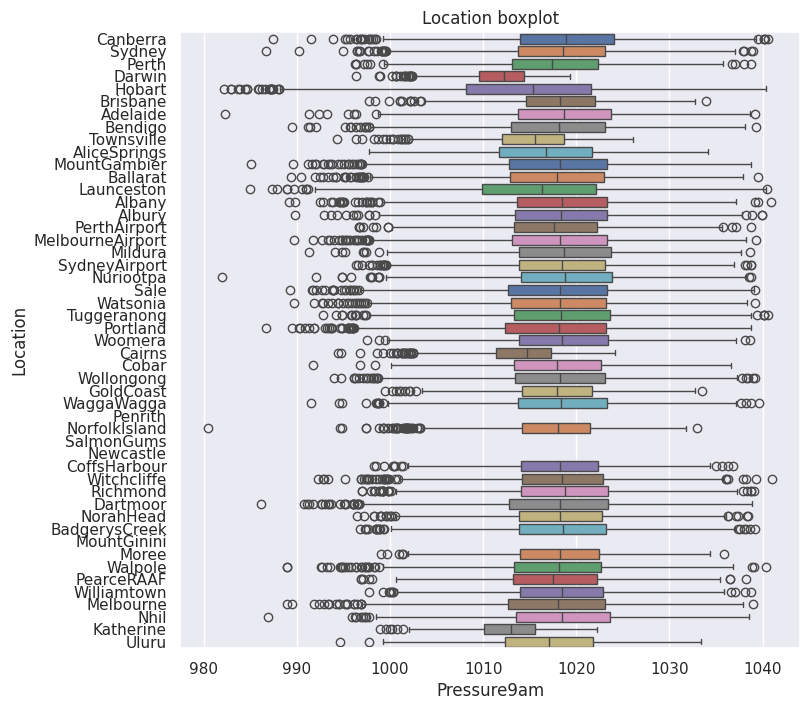

In [469]:
plt.figure(figsize=(8,8))
sns.boxplot(
    data=df,
    x='Pressure9am',
    y="Location",
    palette=sns.color_palette(),
    order=df['Location'].value_counts().index,
)
plt.title('Location boxplot')
plt.show()

### Матрица корреляций

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только __линейной__ связи

In [609]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16', 'int'])

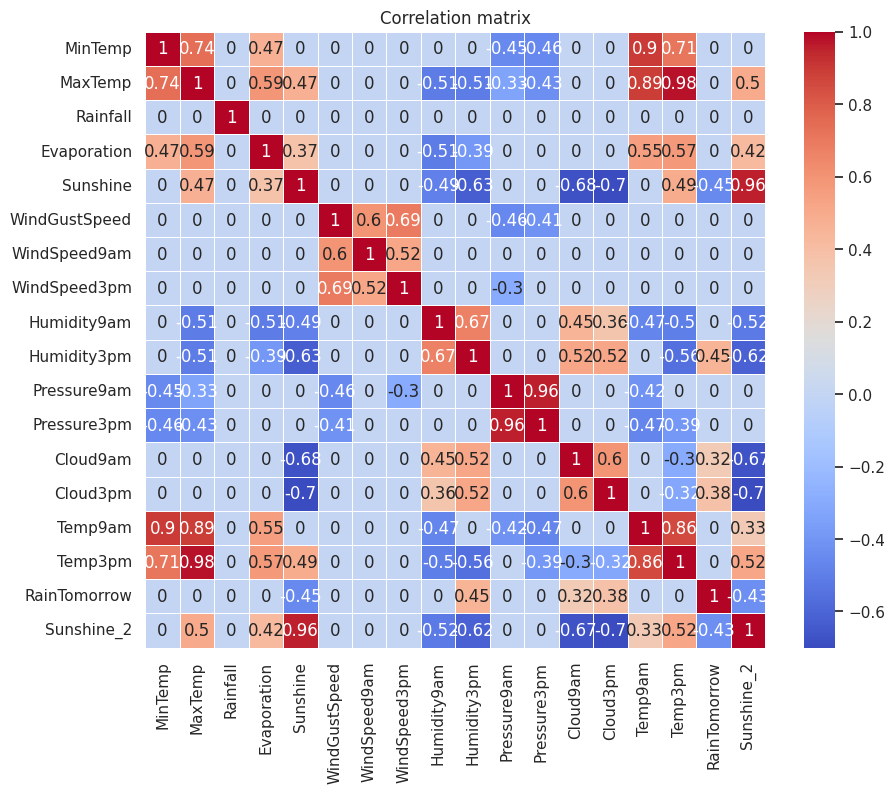

In [610]:
plt.figure(figsize = (10,8))

sns.set(font_scale=1)

corr_matrix = df_num_features.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Вернемся к модели

In [611]:
## Последний результат

X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8593190360464996


In [612]:
## добавим нелинейность

X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

X_train_num_features['Pressure3pm_to9'] = X_train_num_features['Pressure3pm'] / X_train_num_features['Pressure9am']
X_valid_num_features['Pressure3pm_to9'] = X_valid_num_features['Pressure3pm'] / X_valid_num_features['Pressure9am']

X_train_num_features = X_train_num_features.drop(columns=['Pressure3pm'])
X_valid_num_features = X_valid_num_features.drop(columns=['Pressure3pm'])

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.859766257929852
